#### <i> Predictive Modeling FOr Diabetes Managment In The USA </i>
#### <i> Import Library Files </i>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')



#### <i> Load The Dataset </i>

In [19]:
df = pd.read_csv("diabetes_data.csv")
df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,7874,37,0,0,2,2,20.811137,0,10.946207,3.217636,...,1,88.122729,0,0,1,3.154225,3.849584,8.805087,0,Confidential
1875,7875,80,1,0,2,2,27.694312,0,16.067905,7.107335,...,0,77.128599,0,0,1,0.424893,5.217465,0.915878,1,Confidential
1876,7876,38,1,0,0,2,35.640824,0,4.865124,9.881212,...,0,13.148221,0,0,0,0.553757,3.377744,3.017481,1,Confidential
1877,7877,43,0,1,2,0,32.423016,0,6.362936,4.750079,...,0,54.370980,0,0,0,1.132470,0.009250,4.914556,1,Confidential


#### <i> Dataset Overview </i>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [21]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


#### <i> Data Visulization And Analysis </i>

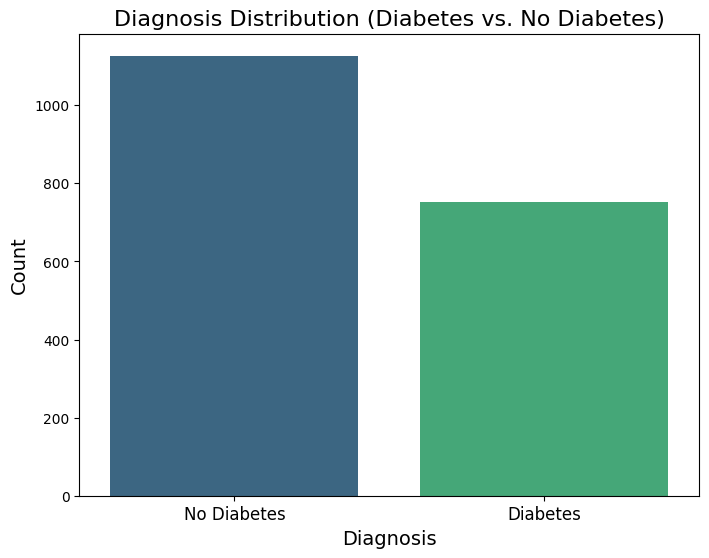

In [22]:
# Check for class imbalance in the target variable
diagnosis_counts = df['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='viridis')
plt.title('Diagnosis Distribution (Diabetes vs. No Diabetes)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], fontsize=12)
plt.show()

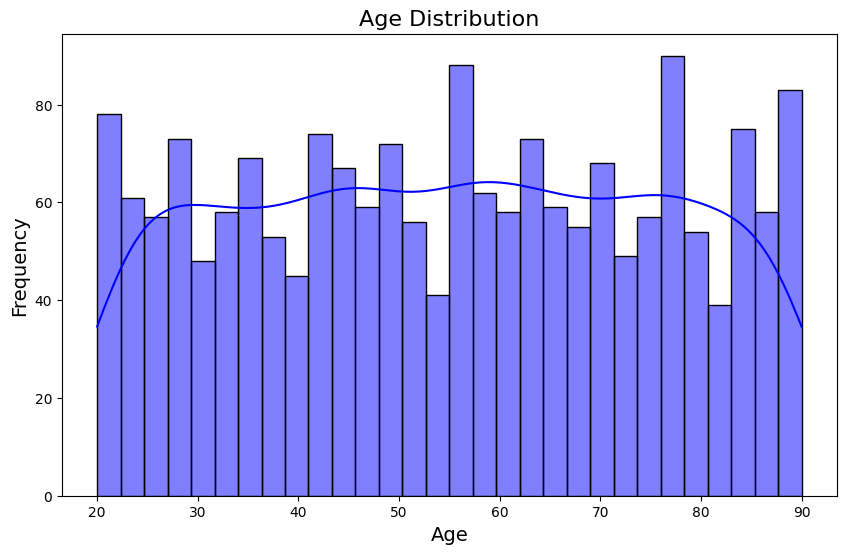

In [23]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

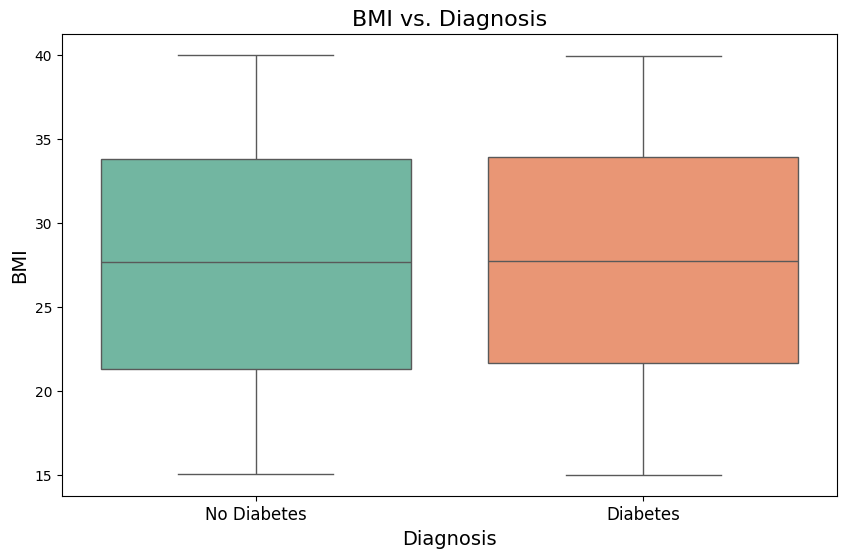

In [24]:
# BMI vs Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=df, palette='Set2')
plt.title('BMI vs. Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], fontsize=12)
plt.show()


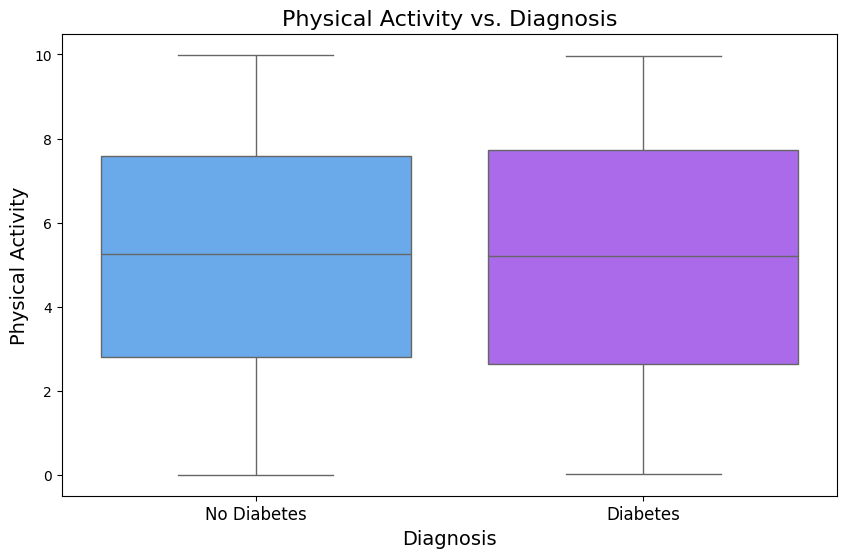

In [25]:
# Physical activity vs. Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df, palette='cool')
plt.title('Physical Activity vs. Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Physical Activity', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], fontsize=12)
plt.show()


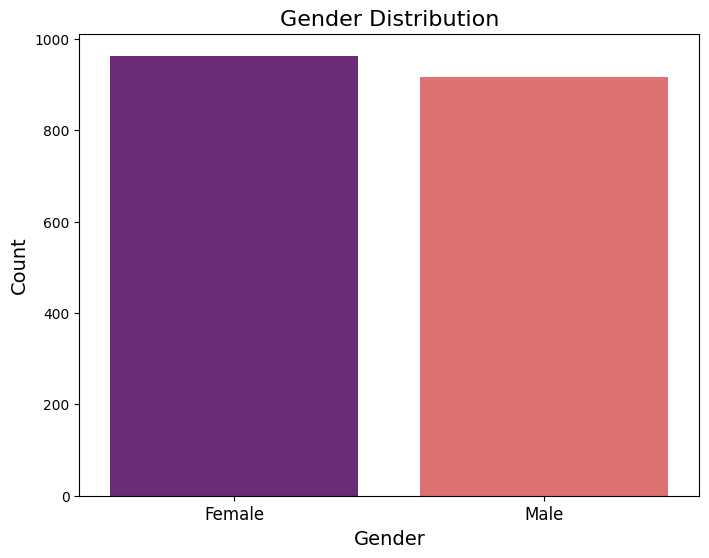

In [26]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='magma')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.show()


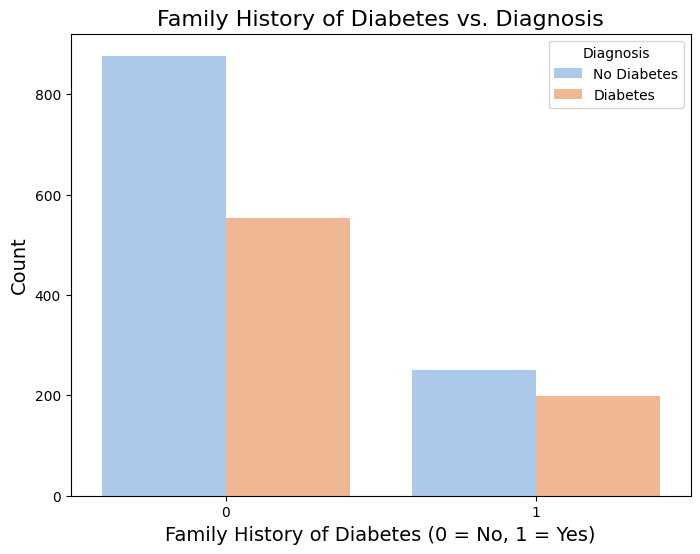

In [27]:
# Family History of Diabetes vs Diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilyHistoryDiabetes', hue='Diagnosis', data=df, palette='pastel')
plt.title('Family History of Diabetes vs. Diagnosis', fontsize=16)
plt.xlabel('Family History of Diabetes (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Diagnosis', labels=['No Diabetes', 'Diabetes'])
plt.show()

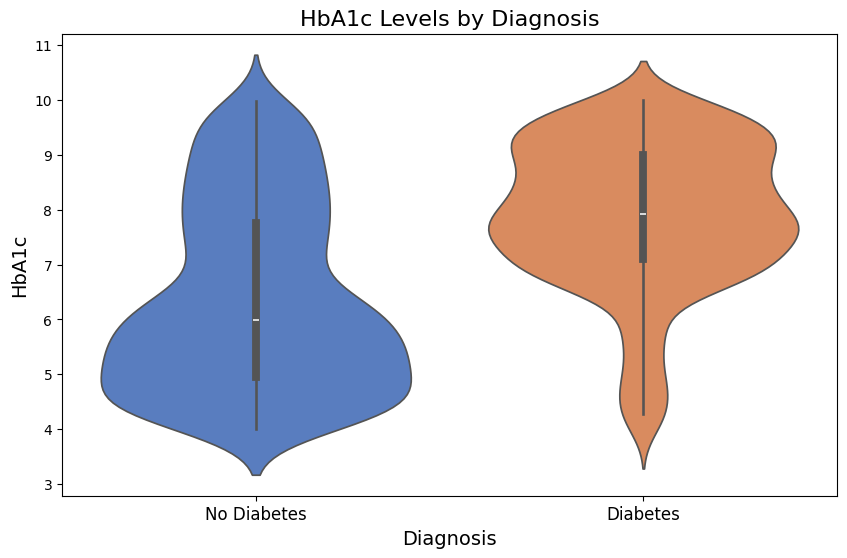

In [28]:
# HbA1c distribution by Diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='HbA1c', data=df, palette='muted')
plt.title('HbA1c Levels by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('HbA1c', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], fontsize=12)
plt.show()

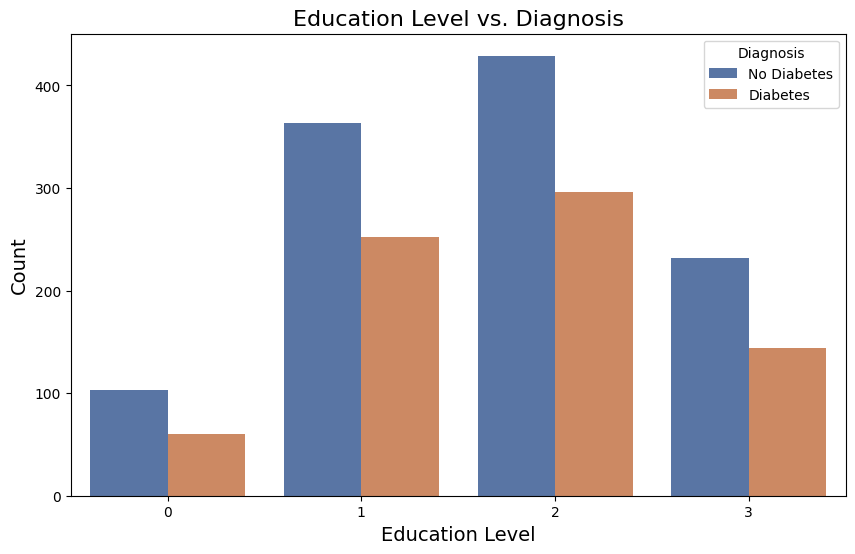

In [29]:
# Education Level and Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationLevel', hue='Diagnosis', data=df, palette='deep')
plt.title('Education Level vs. Diagnosis', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Diagnosis', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### <i> Data Preprocessing </i>

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Handle missing values
# For categorical variables, use the most frequent value
# For numerical variables, use the mean
categorical_columns = ['DoctorInCharge']
numerical_columns = [
    'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
    'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'FatigueLevels', 'QualityOfLifeScore',
    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
]

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Encode categorical variables
encoder = LabelEncoder()
df['DoctorInCharge'] = encoder.fit_transform(df['DoctorInCharge'])

# Feature scaling for numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Encode binary categorical variables if necessary
binary_columns = ['Gender', 'FamilyHistoryDiabetes', 'GestationalDiabetes',
                  'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
                  'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
                  'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
                  'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet',
                  'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality']
for col in binary_columns:
    df[col] = df[col].astype('int')

# Encode the target variable (if not already binary)
df['Diagnosis'] = df['Diagnosis'].astype('int')

# Display dataset after preprocessing
print("Dataset after preprocessing:")
df.head()



Dataset after preprocessing:


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,0.736909,1,-0.946653,-0.965393,...,1,0.878460,0,0,0,-0.191010,-0.161696,0.753258,1,0
1,6001,51,1,0,1,2,1.701079,0,-1.440586,1.085505,...,0,1.493421,0,0,1,1.233118,0.345055,0.004409,1,0
2,6002,89,1,0,1,3,-1.099636,0,-1.508511,0.316010,...,0,0.207893,0,0,0,0.627192,1.372187,0.692848,0,0
3,6003,21,1,1,1,2,0.652280,1,-1.417635,1.206012,...,0,1.021122,0,0,1,-0.523949,-0.629784,-0.100667,0,0
4,6004,27,1,0,1,3,-1.513271,0,0.907540,-0.200055,...,0,-0.374836,0,0,0,-0.693777,0.694190,0.984957,0,0


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the dataset into training and testing sets
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.8351063829787234
Confusion Matrix:
 [[306  41]
 [ 52 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       347
           1       0.80      0.76      0.78       217

    accuracy                           0.84       564
   macro avg       0.83      0.82      0.82       564
weighted avg       0.83      0.84      0.83       564



#### <i> Random Forest Classifier </i>

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9078014184397163
Confusion Matrix:
 [[335  12]
 [ 40 177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       347
           1       0.94      0.82      0.87       217

    accuracy                           0.91       564
   macro avg       0.91      0.89      0.90       564
weighted avg       0.91      0.91      0.91       564



#### <i> Support Vector Classifier </i>

In [33]:
from sklearn.svm import SVC

# Train the SVM model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.8156028368794326
Confusion Matrix:
 [[298  49]
 [ 55 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       347
           1       0.77      0.75      0.76       217

    accuracy                           0.82       564
   macro avg       0.81      0.80      0.80       564
weighted avg       0.81      0.82      0.82       564



#### <i> Comparison Analysis </i>

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.835106   0.800971  0.760369  0.780142   
1        Random Forest  0.907801   0.936508  0.815668  0.871921   
2                  SVM  0.815603   0.767773  0.746544  0.757009   

   Training Time (s)        Confusion Matrix  
0           0.305963  [[306, 41], [52, 165]]  
1           0.381485  [[335, 12], [40, 177]]  
2           3.547610  [[298, 49], [55, 162]]  


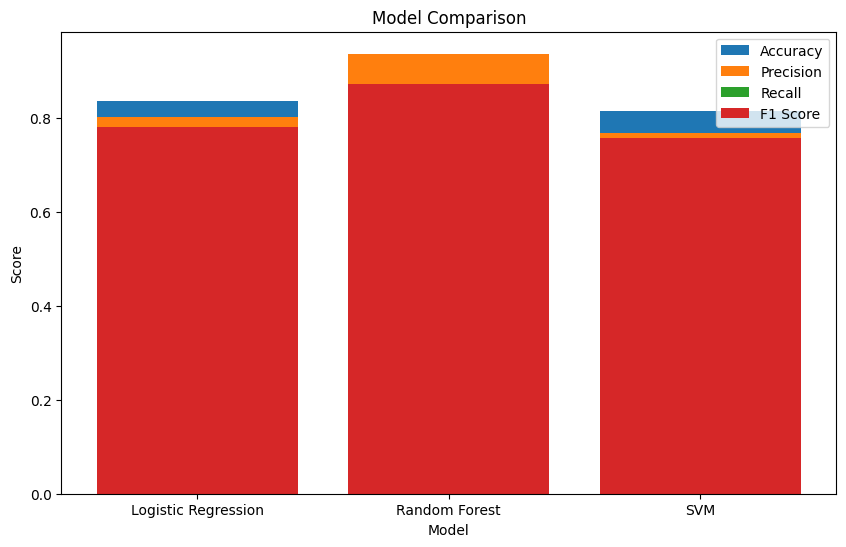

In [34]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate and collect results
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start_time  # Record training time
    
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return {
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Training Time (s)": train_time,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("SVM", SVC(kernel='linear', random_state=42))
]

# Evaluate each model
results = []
for name, model in models:
    results.append(evaluate_model(name, model, X_train, X_test, y_train, y_test))

# Display comparison
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results
import matplotlib.pyplot as plt

# Bar plot for comparison
plt.figure(figsize=(10, 6))
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plt.bar(results_df["Model"], results_df[metric], label=metric)

plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.show()
